In [13]:
from prophet import Prophet
import numpy as np
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
d = pd.read_csv('./yahoo_stock.csv')

In [6]:
d[['Date', 'Close']].dtypes

Date      object
Close    float64
dtype: object

In [8]:
d['Date'] = pd.to_datetime(d['Date'])

In [9]:
d.dtypes

Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Adj Close           float64
dtype: object

In [10]:
df = d[['Date','Close']]

<AxesSubplot: xlabel='Date', ylabel='Close'>

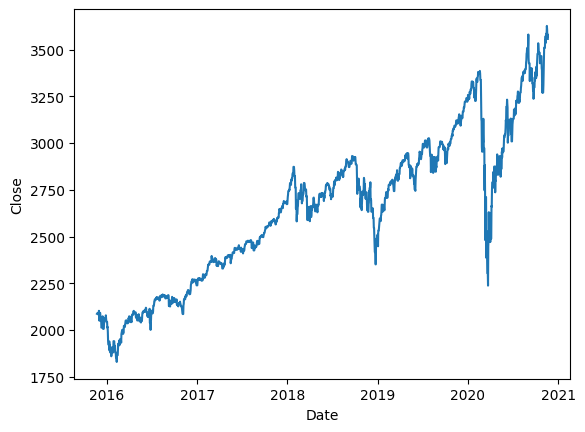

In [14]:
sns.lineplot(x=df['Date'], y=df['Close'])

In [18]:
df['PL'] = np.log1p(d['Close'].pct_change())

/var/folders/z5/j7jtc0rn7311w2p0lghfl0gc0000gn/T/ipykernel_28327/3425300915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PL'] = np.log1p(d['Close'].pct_change())


<AxesSubplot: xlabel='Date', ylabel='PL'>

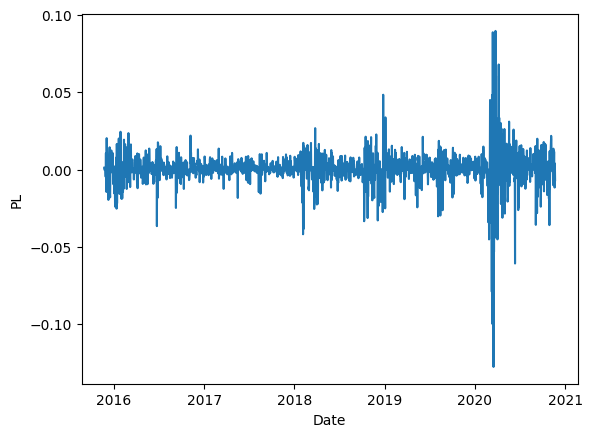

In [20]:
sns.lineplot(x=df['Date'], y=df['PL'])

In [22]:
df = df[['Date','PL']].rename(columns={'Date':'ds','PL':'y'})

In [24]:
train = df.iloc[:-300]
test = df.iloc[-300:]

In [27]:
m = Prophet()

In [28]:
m.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -16.9685


/Users/sruizdeaguirre/miniforge3/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2245.61   6.23644e-07       98.2643           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     105       2245.61   1.21764e-07       98.0612      0.3291           1      138   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [29]:
fcst = m.predict(test)

/Users/sruizdeaguirre/miniforge3/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/sruizdeaguirre/miniforge3/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [33]:
import matplotlib.pyplot as plt

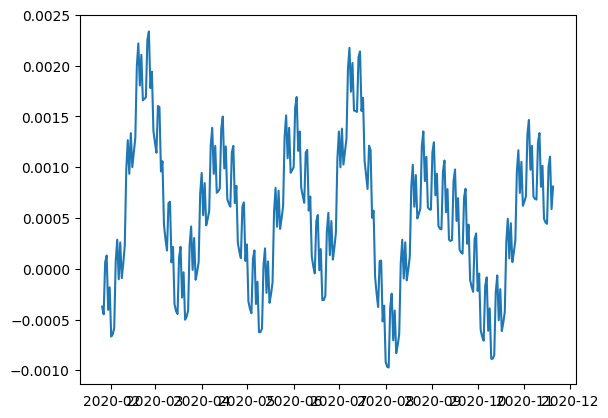

In [39]:
plt.plot(fcst['ds'], fcst['yhat'])


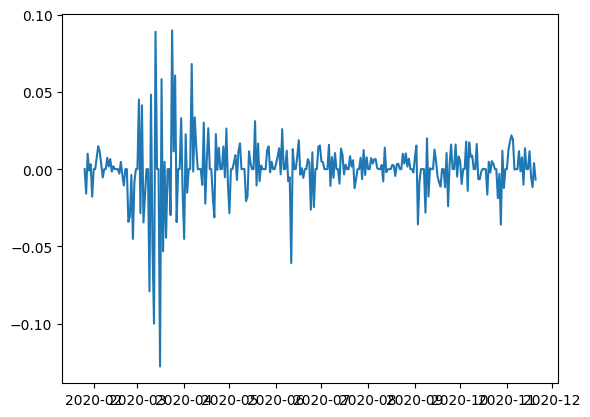

In [40]:
plt.plot(test['ds'], test['y'])